In [1]:
import pandas as pd
import missingno
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [15]:
ls

CAR Assets.xlsx
CAR Cases.xlsx
Customer Attrition.ipynb
Customer Satisfaction Results 20170401-20180630.csv
Expiring Contracts 2018Q2.csv
Renewed Contracts 2018Q2.csv
SALESORDER/
SupportCases Since 20170401.csv
car score copy.txt


In [4]:
expiring = pd.read_csv('Expiring Contracts 2018Q2.csv')

In [5]:
expiring

,ID,SalesOrder#,Billing Dt,Bookings Amount,Bookings Quantity,Material #,Deal Type,Product Type,Reseller #,End Cust #,Contract Start,Contract End,BOARD_GEO,BOARD_PROD_FAMILY,First Year Bkg Amt Commissionable,AccountID
0,360.0,521845,2018-02-02 00:00:00.000,1168.230000,150,DCCMT0001,Renewal,MNT,105124.0,127005.0,2017-05-15 00:00:00.000,2018-05-14 00:00:00.000,EMEA,HT Security,1168.23,0011300001uiG8iAAE
1,3496.0,523331,2018-02-16 00:00:00.000,5250.000000,7500,PDTSV0001,Renewal,SUB,3856.0,113379.0,2018-01-27 00:00:00.000,2018-04-30 00:00:00.000,Americas,HT Security,5250.00,0011300001uiP1HAAU
2,5138.0,524145,2018-02-26 00:00:00.000,236.390000,80,DCEMT0001,Volume,MNT,105124.0,113399.0,2018-02-23 00:00:00.000,2018-06-15 00:00:00.000,EMEA,HT Security,236.39,0011300001uiFanAAE
3,5003.0,494698,2017-05-30 00:00:00.000,180.000000,9,NAU-MA-1504,New,MNT,80474.0,84473.0,2017-05-30 00:00:00.000,2018-05-29 00:00:00.000,Americas,Naurtech,180.00,NaN
4,494.0,498459,2017-07-06 00:00:00.000,3495.000000,500,LDMSSMBPMA-M,Renewal,MNT,3856.0,91034.0,2017-05-16 00:00:00.000,2018-05-15 00:00:00.000,Americas,Systems Management,3495.00,NaN
5,1275710.0,0040012757,2016-08-31 00:00:00.000,2378.700000,900,IN GSP 12 F,New,MNT,1000388.0,2004864.0,2016-08-31 00:00:00.000,2018-06-30 00:00:00.000,EMEA,UPM,1299.74,NaN
6,1275720.0,0040012757,2016-08-31 00:00:00.000,1255.430000,100,DSK GSP 12 F,New,MNT,1000388.0,2004864.0,2016-08-31 00:00:00.000,2018-06-30 00:00:00.000,EMEA,UPM,685.98,NaN
7,2490.0,496048,2017-06-14 00:00:00.000,79.200000,3,120-MA-GENTN2,Volume,MNT,65193.0,79104.0,2017-06-14 00:00:00.000,2018-06-13 00:00:00.000,Americas,Emulation,79.20,NaN
8,4685.0,496982,2017-06-23 00:00:00.000,1411.450000,150,LDMSSMBPMA-M,Renewal,MNT,30879.0,32791.0,2017-06-30 00:00:00.000,2018-06-29 00:00:00.000,EMEA,Systems Management,1411.45,NaN
9,4686.0,496982,2017-06-23 00:00:00.000,1065.310000,150,LDPM-S,Renewal,SUB,30879.0,32791.0,2017-06-30 00:00:00.000,2018-06-29 00:00:00.000,EMEA,Security Management,1065.31,NaN


In [16]:
print(expiring.AccountID.count())
print(expiring.AccountID.shape)

807
(16614,)


In [18]:
cases = pd.read_excel("CAR Cases.xlsx")

In [21]:
cases

,Subject,Status,Case Origin,Case Reason,Opened Date,Closed Date,Case ID,Contact ID,Industry,Account ID,Business Impact,Category,EffectiveClosedDate,Mngr. Escalation Cause,Mngr. Escalated Owner,Problem_Status,Product Line,Product,Product Version,Severity
0,Speakeasy API's,Open: Not Reviewed,Email,Administrative,2018-10-08,NaT,5001B00001A6wPx,0031300002OwnNi,Computer And Data Services,001a000001GZF19,NaN,Other,NaT,Sales watch list,Adam Coffin,NaN,Supply Chain,Speakeasy,NaN,Severity 3 -- Medium
1,Inventaire : données manquantes dans les inven...,Open: Under Review,Web Self-Service,Feature not working as desired,2018-10-05,NaT,5001B00001A6swm,0031B00002cQ5CT,Technology - Services,0011300001txBmd,NaN,Inventory,NaT,Criticality awareness,Michal Grom,NaN,Unified Endpoint Management,Endpoint Manager,Endpoint Manager 2017,Severity 2 -- High
2,Les remontées d'inventaires sont partielles vo...,Open: Under Review,Web Self-Service,Feature not working as desired,2018-10-05,NaT,5001B00001A6sub,0031B00002cQ5CT,Technology - Services,0011300001txBmd,NaN,Inventory,NaT,Criticality awareness,Michal Grom,NaN,Unified Endpoint Management,Endpoint Manager,Endpoint Manager 2017,Severity 2 -- High
3,8.7 Activation,Closed: Resolved,Web Self-Service,Help with system setup or architecture,2018-10-01,2018-10-09,5001B00001A6iIa,0033000000k4FgN,Technology - Services,0013000000dqR7I,Cannot load management suite,Install,2018-10-09 01:44:00,Criticality awareness,Michal Grom,NaN,Unified Endpoint Management,Endpoint Manager,Endpoint Manager 8.7,Severity 2 -- High
4,Vulnerability detection problem: MS18-09-AFP-4...,Open: Escalated to Eng,Web Self-Service,Feature not working as desired,2018-10-01,NaT,5001B00001A6iKC,003a000001WyFh5,Manufacturing,0013000000vu4cA,NaN,Patch Manager,NaT,Dissatisfied with progress,Sterling Parker,At DSI Scrub,Unified Endpoint Management,Endpoint Manager,Endpoint Manager 2017,Severity 3 -- Medium
5,Object reference error message when starting X...,Closed: Resolved,Phone,Feature not working as desired,2018-10-09,2018-10-09,5001B00001A6zEE,0031B00002Z1j1E,Education,0011300001uiJ7l,NaN,Web Client,2018-10-09 22:32:00,NaN,NaN,NaN,Reporting and Analytics,Xtraction,Xtraction 2017.2,Severity 3 -- Medium
6,knowledge permission,Open: Not Reviewed,Web Self-Service,NaN,2018-10-09,NaT,5001B00001A6zDa,0031B00002fxS3W,Manufacturing,0011300001t4Ncl,NaN,Knowledge,NaT,NaN,NaN,NaN,IT Service Management,Service Manager - PREMISE,Service Manager - PREMISE 2017.3.1,Severity 2 -- High
7,Landesk Av license showing 1 days to expired,Open: Waiting on Customer,Web Self-Service,Feature not working as desired,2018-10-09,NaT,5001B00001A6zDV,0031300002XM6yb,Other,0013000000eb4ER,High,Anti-Virus,NaT,NaN,NaN,NaN,Unified Endpoint Management,Endpoint Manager,Endpoint Manager 9.5,Severity 2 -- High
8,Self service links for self service mobile UI,Open: Not Reviewed,Web Self-Service,NaN,2018-10-09,NaT,5001B00001A6zDQ,0031300002VTMaY,Other,0011300001uiEl0,NaN,General,NaT,NaN,NaN,NaN,IT Service Management,Service Manager - PREMISE,Service Manager - PREMISE - ITSM 7.x,Severity 3 -- Medium
9,Running pre-install/uninstall script - failed,Open: Not Reviewed,Web Callback - Now,NaN,2018-10-09,NaT,5001B00001A6zDL,0031B00002i2iKe,Hospitality and Tourism,0011B00001IxODK,NaN,Patch Manager,NaT,NaN,NaN,NaN,Unified Endpoint Management,Endpoint Manager,Endpoint Manager 2017,Severity 4 -- Low


In [30]:
cases.describe(include='all')

,Subject,Status,Case Origin,Case Reason,Opened Date,Closed Date,Case ID,Contact ID,Industry,Account ID,Business Impact,Category,EffectiveClosedDate,Mngr. Escalation Cause,Mngr. Escalated Owner,Problem_Status,Product Line,Product,Product Version,Severity
count,2423,2426,2426,2096,2426,1141,2426,2426,2384,2426,635,2341,1141,5,5,114,2422,2422,2337,2422
unique,2244,15,6,15,9,8,2426,1774,56,1501,554,260,1030,3,3,11,11,63,178,4
top,Anonymous Web Request,Closed: Resolved,Web Self-Service,Feature not working as desired,2018-10-09 00:00:00,2018-10-09 00:00:00,5001B00001A6vd0,003a0000022H8Gf,Technology - Services,0011300001cOblO,Medium,Administration_,2018-10-05 14:22:00,Criticality awareness,Michal Grom,With Development,Unified Endpoint Management,Endpoint Manager,Endpoint Manager 2017,Severity 3 -- Medium
freq,69,999,1474,830,393,239,1,22,224,36,28,132,4,3,3,30,899,543,240,1666
first,NaN,NaN,NaN,NaN,2018-10-01 00:00:00,2018-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-01 02:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2018-10-09 00:00:00,2018-10-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-09 22:32:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
assets = pd.read_excel("CAR Assets.xlsx", skip_footer = 5)

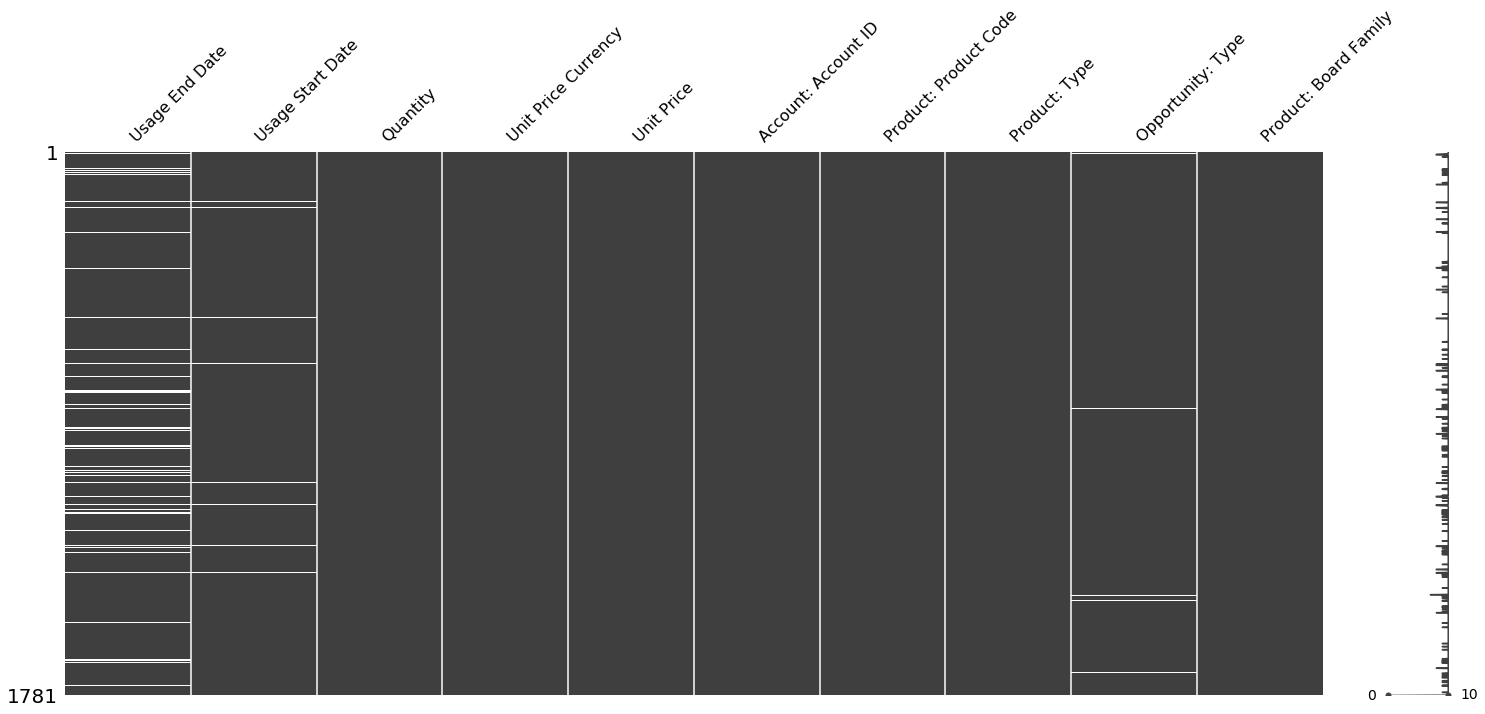

In [16]:
missingno.matrix(assets)

In [94]:
assets.describe(include='all')

,Usage End Date,Usage Start Date,Quantity,Unit Price Currency,Unit Price,Account: Account ID,Product: Product Code,Product: Type,Opportunity: Type,Product: Board Family
count,1604,1741,1780.000000,1780,1780.000000,1780,1780,1780,1768,1780
unique,220,173,NaN,7,NaN,771,324,8,3,25
top,2019-10-04 00:00:00,2018-10-05 00:00:00,NaN,USD,NaN,0011300001uiJAd,120-LI-GENTN2,Maintenance,Renewal,Mobile Middleware
freq,102,212,NaN,1046,NaN,24,120,953,713,246
first,2017-03-29 00:00:00,2015-12-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2025-10-04 00:00:00,2022-10-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,325.595506,NaN,345.611382,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1621.568226,NaN,3526.722809,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,-12683.000000,NaN,0.010000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.000000,NaN,7.147500,NaN,NaN,NaN,NaN,NaN


In [104]:
print(min(assets["Usage End Date"]))
print(max(assets["Usage End Date"]))
print(assets.shape)

2017-03-29 00:00:00
2025-10-04 00:00:00
(1781, 10)


In [110]:

t = assets[assets["Usage End Date"] <= datetime.datetime(2018, 8, 1)]
t

,Usage End Date,Usage Start Date,Quantity,Unit Price Currency,Unit Price,Account: Account ID,Product: Product Code,Product: Type,Opportunity: Type,Product: Board Family
547,2017-03-29,2016-03-30,5000.0,USD,7.07,0011300001l4B7s,DSK GSP 12 F,Maintenance,Volume,UPM
548,2017-03-29,2016-03-30,5000.0,USD,1.89,0011300001l4B7s,IN GSP 12 F,Maintenance,Volume,UPM
549,2018-03-29,2017-03-30,5000.0,USD,1.89,0011300001l4B7s,IN GSP 12 F,Maintenance,Volume,UPM
551,2018-03-29,2017-03-30,5000.0,USD,7.07,0011300001l4B7s,DSK GSP 12 F,Maintenance,Volume,UPM
584,2018-02-21,2017-02-22,-68.0,USD,0.01,0013000000dqR1R,LDPMAO-L,License,Volume,Security
585,2018-02-21,2017-02-22,-26.0,USD,18.03,0013000000dqR1R,LDSVPMA-M,Maintenance,Volume,Systems
586,2018-02-21,2017-02-22,-68.0,USD,33.20,0013000000dqR1R,LDMS-L,License,Volume,Systems
587,2018-02-21,2017-02-22,-68.0,USD,11.18,0013000000dqR1R,LDMSPMA-M,Maintenance,Volume,Systems
588,2018-02-21,2017-02-22,-306.0,USD,11.18,0013000000dqR1R,LDMSPMA-M,Maintenance,Volume,Systems
589,2018-02-21,2017-02-22,-1.0,USD,143.17,0013000000dqR1R,SCNT-PMA-LDMG1000,Maintenance,Volume,Systems


In [111]:
print(min(t["Usage End Date"]))
print(max(t["Usage End Date"]))
print(t.shape)

2017-03-29 00:00:00
2018-07-31 00:00:00
(40, 10)


In [133]:
c = t.groupby(["Account: Account ID"])[['Usage End Date', "Account: Account ID"]].agg('max').reset_index(drop=True)
c

,Usage End Date,Account: Account ID
0,2018-03-29,0011300001l4B7s
1,2018-05-24,0011300001uiHNB
2,2018-06-23,0011300001uiHNa
3,2018-06-29,0011300001uiLca
4,2018-03-31,0011B000027qo6b
5,2018-07-31,0013000000dqOLL
6,2018-07-30,0013000000dqOgt
7,2018-02-21,0013000000dqR1R
8,2018-07-03,0013000000dqR40
9,2018-06-30,0013000000dqREG


In [154]:
renew = []
for index, row in c.iterrows():
    a = row["Usage End Date"]
    b = row["Account: Account ID"]
    for index1, row1 in assets.iterrows():
        aa = row1["Usage Start Date"]
        if ((row1["Account: Account ID"] == b) and (aa > a)):
            renew.append([a,b])
            break           

In [163]:
renew = pd.DataFrame(renew)
renew.columns = ["Usage End Date", "Account: Account ID"]

In [164]:
renew

,Usage End Date,Account: Account ID
0,2018-03-29,0011300001l4B7s
1,2018-03-31,0011B000027qo6b
2,2018-02-21,0013000000dqR1R
3,2018-04-13,0013000000dqT74
4,2018-06-30,0013000000dqTSj
5,2018-07-14,0013000000ealwv
6,2018-03-12,0013000000eb1uk


In [165]:
pd.concat([c,renew]).drop_duplicates(keep=False)

,Usage End Date,Account: Account ID
1,2018-05-24,0011300001uiHNB
2,2018-06-23,0011300001uiHNa
3,2018-06-29,0011300001uiLca
5,2018-07-31,0013000000dqOLL
6,2018-07-30,0013000000dqOgt
8,2018-07-03,0013000000dqR40
9,2018-06-30,0013000000dqREG
10,2018-06-30,0013000000dqRQd
15,2018-06-30,0013000000ebErq


In [169]:
assets["Account: Account ID"].unique().shape

(772,)

In [171]:
c["Account: Account ID"].unique().shape

(16,)

In [5]:
account = pd.read_csv('SALESORDER/ACCOUNT.csv')
account.shape

(35110, 7)

In [6]:
salesorderitem = pd.read_csv('SALESORDER/SALESORDERLINEITEM.csv')
salesorderitem.shape

(707463, 11)

In [7]:
salesorderitem = salesorderitem.dropna(subset=["AGREEMENT_END_DATE__C"])
salesorderitem.shape

(382882, 11)

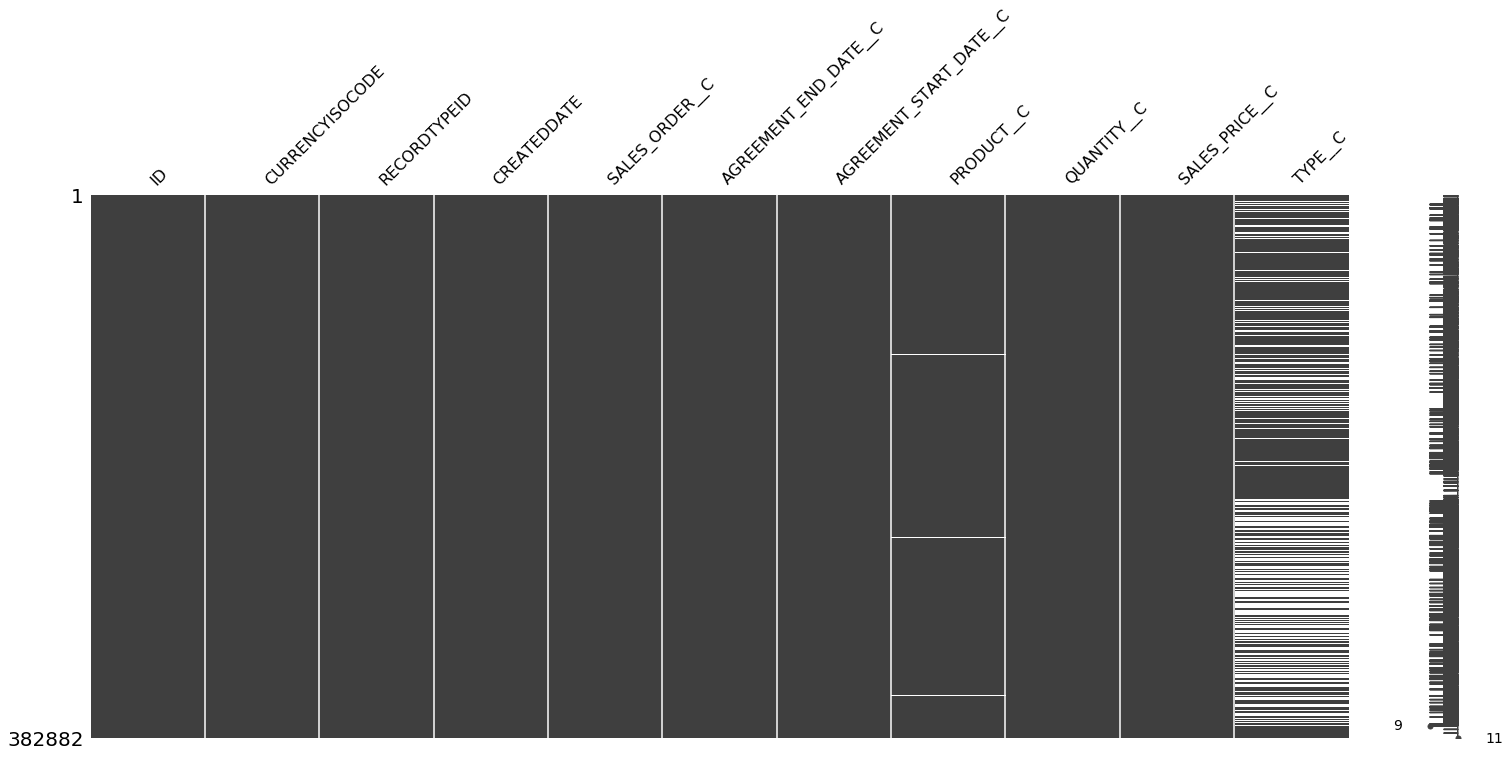

In [8]:
missingno.matrix(salesorderitem)

In [9]:
salesorderitem

,ID,CURRENCYISOCODE,RECORDTYPEID,CREATEDDATE,SALES_ORDER__C,AGREEMENT_END_DATE__C,AGREEMENT_START_DATE__C,PRODUCT__C,QUANTITY__C,SALES_PRICE__C,TYPE__C
215,a1L1B000009R0o9UAC,USD,012a0000001ZQrnAAG,2017-10-18 20:59:17.000,a1M1B00000XzbuNUAR,2020-08-02 00:00:00.000,2017-08-03 00:00:00.000,01t130000054gvQAAQ,4.0,60.00,Renewal
216,a1L1B000009R0k7UAC,USD,012a0000001ZQrnAAG,2017-10-18 20:25:31.000,a1M1B00000XzbtjUAB,2020-10-17 00:00:00.000,2017-10-18 00:00:00.000,01ta0000003xha7AAA,9.0,51.75,Volume
217,a1L1B000009R0k8UAC,USD,012a0000001ZQrnAAG,2017-10-18 20:25:31.000,a1M1B00000XzbtjUAB,2020-10-17 00:00:00.000,2017-10-18 00:00:00.000,01ta0000003xhZsAAI,9.0,34.17,Volume
218,a1L1B000009QzxkUAC,EUR,012a0000001ZQrnAAG,2017-10-18 12:38:16.000,a1M1B00000XzbjPUAR,2018-10-17 00:00:00.000,2017-10-18 00:00:00.000,01t130000054guDAAQ,1.0,89.90,Volume
219,a1L1B000009R0akUAC,USD,012a0000001ZQrnAAG,2017-10-18 19:14:15.000,a1M1B00000XzbsHUAR,2018-01-17 00:00:00.000,2017-10-18 00:00:00.000,01ta0000003xhaVAAQ,1.0,123.75,Volume
220,a1L1B000009R0ABUA0,USD,012a0000001ZQrnAAG,2017-10-18 14:31:51.000,a1M1B00000XzbluUAB,2018-10-17 00:00:00.000,2017-10-18 00:00:00.000,01ta0000003xhZfAAI,3.0,28.05,Volume
221,a1L13000005SkuCEAS,USD,012a0000001ZQroAAG,2017-03-23 19:05:03.000,a1M1300000KTJDfEAP,2018-05-04 00:00:00.000,2017-05-05 00:00:00.000,01t130000053tBWAAY,2500.0,3.60,Renewal
222,a1L1B000009R0ACUA0,USD,012a0000001ZQrnAAG,2017-10-18 14:31:51.000,a1M1B00000XzbluUAB,2018-10-17 00:00:00.000,2017-10-18 00:00:00.000,01ta0000003xha3AAA,3.0,37.20,Volume
223,a1L1B000009R0ADUA0,USD,012a0000001ZQrnAAG,2017-10-18 14:31:51.000,a1M1B00000XzbluUAB,2018-10-17 00:00:00.000,2017-10-18 00:00:00.000,01ta0000003xhZ5AAI,3.0,10.20,Volume
224,a1L1B000009R0AEUA0,USD,012a0000001ZQrnAAG,2017-10-18 14:31:51.000,a1M1B00000XzbluUAB,2018-10-17 00:00:00.000,2017-10-18 00:00:00.000,01ta0000003xhaVAAQ,3.0,102.30,Volume


In [10]:
salesorder = pd.read_csv("SALESORDER/SALESORDER.csv")

In [11]:
salesorder

,ID,CURRENCYISOCODE,CREATEDDATE,CUSTOMER__C,DATED_EXCHANGE_RATE__C,PARTNER__C,RESELLER_INTERMEDIARY__C
0,a1M1B00000NIdvWUAT,GBP,43:00.0,0011300001l4QU3AAM,0.774910,0013000000eb8zWAAQ,NaN
1,a1M13000005VmmREAS,USD,51:48.0,001a000001NIV37AAH,1.000000,001a000001NIV37AAH,NaN
2,a1M13000005KVrmEAG,EUR,48:09.0,0011300001hDPjSAAW,0.917000,001a000001StSanAAF,0013000000jMDM0AAO
3,a1M1300000UNsWoEAL,USD,50:48.0,001a000001NIH3OAAX,1.000000,001a000001NIH3OAAX,NaN
4,a1M13000005KVtJEAW,USD,59:32.0,0011300001jGI9EAAW,1.000000,001a000001NIG54AAH,0011300001icf63AAA
5,a1M13000005KVtEEAW,USD,57:05.0,0011300001ibcgQAAQ,1.000000,0011B00001IwOAbQAN,0013000000dqMt0AAE
6,a1M13000005JON9EAO,USD,55:10.0,0011300001i9fvzAAA,1.000000,0011B00001IwOAbQAN,001a000001NINf0AAH
7,a1M1300000DbVzZEAV,USD,59:06.0,0011300001cvFoqAAE,1.000000,001a000001NIFq5AAH,001a000001NIVqyAAH
8,a1M13000005XVmCEAW,USD,25:06.0,0013000000dqNsRAAU,1.000000,NaN,NaN
9,a1M13000005XVqiEAG,JPY,21:18.0,0013000000dqUlGAAU,123.152710,NaN,NaN


In [19]:
new = salesorderitem.join(salesorder.set_index('ID'), on='SALES_ORDER__C', lsuffix='_L')

In [20]:
new = new[["ID","AGREEMENT_END_DATE__C","AGREEMENT_START_DATE__C","PRODUCT__C","QUANTITY__C","TYPE__C","CUSTOMER__C"]]
new = new.dropna(subset = ["CUSTOMER__C"])
new.shape

(261506, 7)

In [21]:
new.describe(include = 'all')

,ID,AGREEMENT_END_DATE__C,AGREEMENT_START_DATE__C,PRODUCT__C,QUANTITY__C,TYPE__C,CUSTOMER__C
count,261506,261506,261470,259566,261506.000000,146118,261506
unique,261506,2859,2406,1562,NaN,3,24368
top,a1L1B000009SEGHUA4,2018-12-31 00:00:00.000,2018-01-01 00:00:00.000,01t1B000004UWL4QAO,NaN,Renewal,0011B00001IwGMgQAN
freq,1,4679,4681,75454,NaN,89800,8239
mean,NaN,NaN,NaN,NaN,624.765832,NaN,NaN
std,NaN,NaN,NaN,NaN,7175.708615,NaN,NaN
min,NaN,NaN,NaN,NaN,-850708.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,195.000000,NaN,NaN


In [22]:
new["AGREEMENT_END_DATE__C"] = pd.to_datetime(new['AGREEMENT_END_DATE__C'])
new["AGREEMENT_START_DATE__C"] = pd.to_datetime(new['AGREEMENT_START_DATE__C'])
t = new[new["AGREEMENT_END_DATE__C"] <= datetime.datetime(2018, 8, 1)]
t.shape

(192023, 7)

In [27]:
t.describe(include = 'all')

,ID,AGREEMENT_END_DATE__C,AGREEMENT_START_DATE__C,PRODUCT__C,QUANTITY__C,TYPE__C,CUSTOMER__C
count,192023,192023,191998,190219,192023.000000,82671,192023
unique,192023,1592,1693,1086,NaN,3,16252
top,a1L1300000256bVEAQ,2017-12-31 00:00:00,2017-01-01 00:00:00,01t1B000004UWL4QAO,NaN,Renewal,0011B00001IwGMgQAN
freq,1,4061,3173,74390,NaN,47779,8234
first,NaN,1899-12-31 00:00:00,1916-12-31 00:00:00,NaN,NaN,NaN,NaN
last,NaN,2018-08-01 00:00:00,2207-12-15 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,506.889977,NaN,NaN
std,NaN,NaN,NaN,NaN,7429.447826,NaN,NaN
min,NaN,NaN,NaN,NaN,-850708.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [17]:
c = t.groupby(["CUSTOMER__C"])[['AGREEMENT_END_DATE__C', "CUSTOMER__C"]].agg('max').reset_index(drop=True)
c

,AGREEMENT_END_DATE__C,CUSTOMER__C
0,2017-06-23,0011300001Z4hAdAAJ
1,2018-01-31,0011300001Z4oYuAAJ
2,2017-09-20,0011300001Z4pY2AAJ
3,2016-07-31,0011300001Z4qeGAAR
4,2017-09-03,0011300001Z4tTHAAZ
5,2017-07-06,0011300001Z4uy0AAB
6,2017-08-03,0011300001Z4v48AAB
7,2018-06-04,0011300001Z4y0TAAR
8,2018-06-04,0011300001Z4y2yAAB
9,2018-07-06,0011300001Z4y3hAAB


In [18]:
c.shape

(16252, 2)

In [35]:

import time
renew = []
for index, row in c.iterrows():
    time1 = time.time()
    a = row["AGREEMENT_END_DATE__C"]
    b = row["CUSTOMER__C"]
    temp = new[new["CUSTOMER__C"] == b]
    if temp["AGREEMENT_START_DATE__C"].max() > a:
        renew.append([a,b])
    time2 = time.time()
    print(index, time1-time2)

0 -0.02279806137084961
1 -0.022511005401611328
2 -0.023339033126831055
3 -0.02461719512939453
4 -0.02359294891357422
5 -0.022535085678100586
6 -0.022941112518310547
7 -0.021303892135620117
8 -0.023326873779296875
9 -0.021555185317993164
10 -0.022939205169677734
11 -0.02433919906616211
12 -0.022382020950317383
13 -0.022382020950317383
14 -0.023878097534179688
15 -0.02314591407775879
16 -0.022507190704345703
17 -0.022221088409423828
18 -0.022588014602661133
19 -0.0214540958404541
20 -0.02237105369567871
21 -0.023916006088256836
22 -0.022159099578857422
23 -0.0228731632232666
24 -0.023550987243652344
25 -0.026786088943481445
26 -0.02362799644470215
27 -0.022274017333984375
28 -0.02257680892944336
29 -0.0230100154876709
30 -0.023581981658935547
31 -0.023010969161987305
32 -0.021400928497314453
33 -0.021709918975830078
34 -0.023217201232910156
35 -0.021169185638427734
36 -0.02199411392211914
37 -0.022253990173339844
38 -0.02223491668701172
39 -0.022530794143676758
40 -0.021303892135620117
4

330 -0.02153301239013672
331 -0.023225069046020508
332 -0.02033400535583496
333 -0.020933866500854492
334 -0.020344018936157227
335 -0.021576881408691406
336 -0.02079606056213379
337 -0.02151799201965332
338 -0.020582914352416992
339 -0.020514965057373047
340 -0.020162105560302734
341 -0.02507495880126953
342 -0.02126598358154297
343 -0.021132946014404297
344 -0.02030205726623535
345 -0.02066493034362793
346 -0.020477771759033203
347 -0.021317005157470703
348 -0.019685029983520508
349 -0.020969152450561523
350 -0.019633054733276367
351 -0.021502017974853516
352 -0.021427154541015625
353 -0.019854068756103516
354 -0.022032976150512695
355 -0.02009892463684082
356 -0.02108311653137207
357 -0.021241188049316406
358 -0.02178502082824707
359 -0.020882844924926758
360 -0.020559072494506836
361 -0.022466182708740234
362 -0.02165389060974121
363 -0.021750926971435547
364 -0.02452397346496582
365 -0.02626514434814453
366 -0.022607088088989258
367 -0.021844148635864258
368 -0.02148890495300293
3

653 -0.022136926651000977
654 -0.023251056671142578
655 -0.022289037704467773
656 -0.022497892379760742
657 -0.022701025009155273
658 -0.022705078125
659 -0.022099018096923828
660 -0.022043943405151367
661 -0.022084951400756836
662 -0.02288198471069336
663 -0.021385908126831055
664 -0.021018028259277344
665 -0.023707866668701172
666 -0.02099299430847168
667 -0.02120518684387207
668 -0.02133798599243164
669 -0.021246910095214844
670 -0.02265787124633789
671 -0.02152109146118164
672 -0.021461963653564453
673 -0.01995086669921875
674 -0.02103710174560547
675 -0.020874977111816406
676 -0.021919965744018555
677 -0.020685911178588867
678 -0.02010512351989746
679 -0.019329071044921875
680 -0.01931595802307129
681 -0.01896190643310547
682 -0.01861095428466797
683 -0.01865386962890625
684 -0.022487878799438477
685 -0.02124190330505371
686 -0.0221710205078125
687 -0.021438121795654297
688 -0.020097970962524414
689 -0.0197908878326416
690 -0.019814014434814453
691 -0.0204160213470459
692 -0.02056

979 -0.022716045379638672
980 -0.023267030715942383
981 -0.02186298370361328
982 -0.02079010009765625
983 -0.022947072982788086
984 -0.022743940353393555
985 -0.02188396453857422
986 -0.022027015686035156
987 -0.022044897079467773
988 -0.022650957107543945
989 -0.023536205291748047
990 -0.022727012634277344
991 -0.022413969039916992
992 -0.0210418701171875
993 -0.02172398567199707
994 -0.02251291275024414
995 -0.020900964736938477
996 -0.02217698097229004
997 -0.022317171096801758
998 -0.022686004638671875
999 -0.022515058517456055
1000 -0.02272796630859375
1001 -0.022037029266357422
1002 -0.022736072540283203
1003 -0.021175861358642578
1004 -0.023012876510620117
1005 -0.021358966827392578
1006 -0.02266216278076172
1007 -0.02286696434020996
1008 -0.023890972137451172
1009 -0.022372007369995117
1010 -0.02090597152709961
1011 -0.021984100341796875
1012 -0.02080988883972168
1013 -0.02244281768798828
1014 -0.021115779876708984
1015 -0.020722150802612305
1016 -0.021604061126708984
1017 -0.0

1294 -0.02056884765625
1295 -0.02297186851501465
1296 -0.02102804183959961
1297 -0.020152807235717773
1298 -0.02080702781677246
1299 -0.020406007766723633
1300 -0.01974201202392578
1301 -0.02065896987915039
1302 -0.02015519142150879
1303 -0.020008087158203125
1304 -0.020039081573486328
1305 -0.02157306671142578
1306 -0.021218061447143555
1307 -0.023097991943359375
1308 -0.02298283576965332
1309 -0.021027088165283203
1310 -0.019882917404174805
1311 -0.020300865173339844
1312 -0.021673917770385742
1313 -0.020907163619995117
1314 -0.01964402198791504
1315 -0.019807100296020508
1316 -0.0222470760345459
1317 -0.02024388313293457
1318 -0.021313905715942383
1319 -0.022135019302368164
1320 -0.02195000648498535
1321 -0.02048802375793457
1322 -0.019662857055664062
1323 -0.018611907958984375
1324 -0.021044015884399414
1325 -0.02131795883178711
1326 -0.020601987838745117
1327 -0.020960092544555664
1328 -0.02110004425048828
1329 -0.018902063369750977
1330 -0.019677162170410156
1331 -0.0191588401794

1605 -0.022179126739501953
1606 -0.02198505401611328
1607 -0.022332191467285156
1608 -0.021313905715942383
1609 -0.0213470458984375
1610 -0.021646976470947266
1611 -0.021129131317138672
1612 -0.021646976470947266
1613 -0.02213120460510254
1614 -0.022192001342773438
1615 -0.02269291877746582
1616 -0.02340102195739746
1617 -0.02101612091064453
1618 -0.022230148315429688
1619 -0.02390599250793457
1620 -0.020834922790527344
1621 -0.0221860408782959
1622 -0.021087169647216797
1623 -0.022249937057495117
1624 -0.023594141006469727
1625 -0.023808002471923828
1626 -0.022184133529663086
1627 -0.022269010543823242
1628 -0.02180790901184082
1629 -0.020669937133789062
1630 -0.0212860107421875
1631 -0.02180004119873047
1632 -0.02180194854736328
1633 -0.021377086639404297
1634 -0.021569013595581055
1635 -0.024097919464111328
1636 -0.022337913513183594
1637 -0.02220916748046875
1638 -0.022678852081298828
1639 -0.02253580093383789
1640 -0.021648883819580078
1641 -0.022210121154785156
1642 -0.0217669010

1918 -0.019756078720092773
1919 -0.022263050079345703
1920 -0.019781827926635742
1921 -0.020524024963378906
1922 -0.019728899002075195
1923 -0.019878149032592773
1924 -0.020437955856323242
1925 -0.019131898880004883
1926 -0.019982099533081055
1927 -0.0201108455657959
1928 -0.019685029983520508
1929 -0.02097797393798828
1930 -0.021784067153930664
1931 -0.021090984344482422
1932 -0.01996612548828125
1933 -0.019109010696411133
1934 -0.01920795440673828
1935 -0.018388986587524414
1936 -0.018548965454101562
1937 -0.01873302459716797
1938 -0.0189211368560791
1939 -0.019253015518188477
1940 -0.018965959548950195
1941 -0.019356966018676758
1942 -0.022024154663085938
1943 -0.01960897445678711
1944 -0.018450021743774414
1945 -0.01866888999938965
1946 -0.019602060317993164
1947 -0.02013087272644043
1948 -0.019344091415405273
1949 -0.02129817008972168
1950 -0.022539138793945312
1951 -0.022464990615844727
1952 -0.0210418701171875
1953 -0.019908905029296875
1954 -0.019482135772705078
1955 -0.0187950

2229 -0.022945880889892578
2230 -0.024460792541503906
2231 -0.021584033966064453
2232 -0.0233612060546875
2233 -0.021250009536743164
2234 -0.022879838943481445
2235 -0.02198004722595215
2236 -0.02266693115234375
2237 -0.022925138473510742
2238 -0.023692846298217773
2239 -0.023479938507080078
2240 -0.022423982620239258
2241 -0.022194862365722656
2242 -0.022370100021362305
2243 -0.022583961486816406
2244 -0.021844148635864258
2245 -0.023855924606323242
2246 -0.021851062774658203
2247 -0.022767066955566406
2248 -0.021467924118041992
2249 -0.0232999324798584
2250 -0.021836042404174805
2251 -0.02219986915588379
2252 -0.02319502830505371
2253 -0.02169013023376465
2254 -0.021494150161743164
2255 -0.021718978881835938
2256 -0.021811962127685547
2257 -0.022539854049682617
2258 -0.023180007934570312
2259 -0.022973060607910156
2260 -0.021780967712402344
2261 -0.021458864212036133
2262 -0.02153801918029785
2263 -0.022951126098632812
2264 -0.022691011428833008
2265 -0.022141218185424805
2266 -0.021

2538 -0.02041006088256836
2539 -0.019466161727905273
2540 -0.022198915481567383
2541 -0.022325992584228516
2542 -0.022125959396362305
2543 -0.023347854614257812
2544 -0.02066206932067871
2545 -0.020463943481445312
2546 -0.01932382583618164
2547 -0.019703149795532227
2548 -0.020277976989746094
2549 -0.019939184188842773
2550 -0.022480010986328125
2551 -0.0212249755859375
2552 -0.020395994186401367
2553 -0.01974797248840332
2554 -0.019162893295288086
2555 -0.021218061447143555
2556 -0.02090287208557129
2557 -0.021161794662475586
2558 -0.019798994064331055
2559 -0.02045607566833496
2560 -0.02202606201171875
2561 -0.02089095115661621
2562 -0.020431041717529297
2563 -0.020678997039794922
2564 -0.019026994705200195
2565 -0.02073383331298828
2566 -0.01889491081237793
2567 -0.018744945526123047
2568 -0.018796920776367188
2569 -0.020607948303222656
2570 -0.02033090591430664
2571 -0.02285909652709961
2572 -0.01964592933654785
2573 -0.021521806716918945
2574 -0.019346952438354492
2575 -0.02016997

2850 -0.02379608154296875
2851 -0.0229189395904541
2852 -0.022930145263671875
2853 -0.022799968719482422
2854 -0.021725893020629883
2855 -0.02206707000732422
2856 -0.021667957305908203
2857 -0.02247905731201172
2858 -0.021955013275146484
2859 -0.022284984588623047
2860 -0.023684978485107422
2861 -0.02239203453063965
2862 -0.021165132522583008
2863 -0.021810054779052734
2864 -0.021541118621826172
2865 -0.022993087768554688
2866 -0.021693944931030273
2867 -0.022196054458618164
2868 -0.022173166275024414
2869 -0.023155927658081055
2870 -0.021641969680786133
2871 -0.022238969802856445
2872 -0.02266407012939453
2873 -0.0217130184173584
2874 -0.022042036056518555
2875 -0.022650957107543945
2876 -0.02198505401611328
2877 -0.022272109985351562
2878 -0.022731781005859375
2879 -0.023215055465698242
2880 -0.021124839782714844
2881 -0.025057077407836914
2882 -0.02297496795654297
2883 -0.02369403839111328
2884 -0.023163795471191406
2885 -0.020870208740234375
2886 -0.02191615104675293
2887 -0.021332

3160 -0.02038097381591797
3161 -0.019587993621826172
3162 -0.022984027862548828
3163 -0.019900083541870117
3164 -0.0196990966796875
3165 -0.02024078369140625
3166 -0.020573854446411133
3167 -0.02024221420288086
3168 -0.01887798309326172
3169 -0.021479129791259766
3170 -0.019271135330200195
3171 -0.020592927932739258
3172 -0.019826173782348633
3173 -0.02273416519165039
3174 -0.020581960678100586
3175 -0.01949620246887207
3176 -0.019099950790405273
3177 -0.02039313316345215
3178 -0.022737979888916016
3179 -0.02012801170349121
3180 -0.02168107032775879
3181 -0.023468017578125
3182 -0.0226590633392334
3183 -0.02417302131652832
3184 -0.023530960083007812
3185 -0.022628068923950195
3186 -0.023067951202392578
3187 -0.022272109985351562
3188 -0.021322011947631836
3189 -0.021583080291748047
3190 -0.0214231014251709
3191 -0.022674083709716797
3192 -0.022333860397338867
3193 -0.022795915603637695
3194 -0.02329397201538086
3195 -0.022423982620239258
3196 -0.021795034408569336
3197 -0.0215649604797

3473 -0.02205514907836914
3474 -0.02341294288635254
3475 -0.023784160614013672
3476 -0.022758960723876953
3477 -0.022964000701904297
3478 -0.021848201751708984
3479 -0.022485017776489258
3480 -0.02178502082824707
3481 -0.021919965744018555
3482 -0.020994186401367188
3483 -0.02244091033935547
3484 -0.023775100708007812
3485 -0.021600961685180664
3486 -0.02052903175354004
3487 -0.021126985549926758
3488 -0.02061605453491211
3489 -0.020123958587646484
3490 -0.02147507667541504
3491 -0.020013093948364258
3492 -0.019757986068725586
3493 -0.019661903381347656
3494 -0.022741079330444336
3495 -0.022686004638671875
3496 -0.020422935485839844
3497 -0.01987004280090332
3498 -0.019546985626220703
3499 -0.01878809928894043
3500 -0.019876956939697266
3501 -0.02106189727783203
3502 -0.01912093162536621
3503 -0.019359111785888672
3504 -0.021728992462158203
3505 -0.021699905395507812
3506 -0.020212888717651367
3507 -0.018922805786132812
3508 -0.020296096801757812
3509 -0.02080988883972168
3510 -0.02040

3785 -0.022365093231201172
3786 -0.023801088333129883
3787 -0.023366928100585938
3788 -0.023083925247192383
3789 -0.02182602882385254
3790 -0.022340059280395508
3791 -0.021600961685180664
3792 -0.022245168685913086
3793 -0.021691083908081055
3794 -0.022997140884399414
3795 -0.023825883865356445
3796 -0.021731138229370117
3797 -0.02277207374572754
3798 -0.021806001663208008
3799 -0.02276897430419922
3800 -0.022172927856445312
3801 -0.023674964904785156
3802 -0.022030115127563477
3803 -0.021223068237304688
3804 -0.02426290512084961
3805 -0.021420001983642578
3806 -0.02302098274230957
3807 -0.021196842193603516
3808 -0.022357940673828125
3809 -0.021567821502685547
3810 -0.02237391471862793
3811 -0.022207975387573242
3812 -0.02267003059387207
3813 -0.0221560001373291
3814 -0.02324199676513672
3815 -0.02262115478515625
3816 -0.021763086318969727
3817 -0.022201061248779297
3818 -0.022861003875732422
3819 -0.022823095321655273
3820 -0.021776914596557617
3821 -0.023712873458862305
3822 -0.0218

4094 -0.02038288116455078
4095 -0.021483182907104492
4096 -0.020205974578857422
4097 -0.02000594139099121
4098 -0.02029895782470703
4099 -0.024730920791625977
4100 -0.02106308937072754
4101 -0.0209200382232666
4102 -0.020797014236450195
4103 -0.02140212059020996
4104 -0.022058963775634766
4105 -0.02446889877319336
4106 -0.022132158279418945
4107 -0.0222017765045166
4108 -0.02170705795288086
4109 -0.022488117218017578
4110 -0.022290945053100586
4111 -0.02033090591430664
4112 -0.019701004028320312
4113 -0.020521163940429688
4114 -0.020300865173339844
4115 -0.023167848587036133
4116 -0.021925926208496094
4117 -0.0278470516204834
4118 -0.020416975021362305
4119 -0.02764892578125
4120 -0.021572113037109375
4121 -0.026649951934814453
4122 -0.019884824752807617
4123 -0.022925138473510742
4124 -0.020756006240844727
4125 -0.023746013641357422
4126 -0.020695924758911133
4127 -0.020804166793823242
4128 -0.02099895477294922
4129 -0.01995682716369629
4130 -0.02271294593811035
4131 -0.02023792266845

4404 -0.02343297004699707
4405 -0.021121978759765625
4406 -0.023849964141845703
4407 -0.022377967834472656
4408 -0.02450394630432129
4409 -0.021835803985595703
4410 -0.021390199661254883
4411 -0.023192882537841797
4412 -0.023683786392211914
4413 -0.021891117095947266
4414 -0.020839929580688477
4415 -0.02176690101623535
4416 -0.023345947265625
4417 -0.023462772369384766
4418 -0.02139592170715332
4419 -0.02228713035583496
4420 -0.02255702018737793
4421 -0.021579980850219727
4422 -0.021928787231445312
4423 -0.020746946334838867
4424 -0.0228729248046875
4425 -0.02334904670715332
4426 -0.022178173065185547
4427 -0.021365880966186523
4428 -0.02148294448852539
4429 -0.022513866424560547
4430 -0.022042036056518555
4431 -0.02295398712158203
4432 -0.022487163543701172
4433 -0.024075031280517578
4434 -0.022403955459594727
4435 -0.022986173629760742
4436 -0.02117609977722168
4437 -0.022717952728271484
4438 -0.021687030792236328
4439 -0.022021055221557617
4440 -0.022411108016967773
4441 -0.02161598

4720 -0.02141118049621582
4721 -0.021492958068847656
4722 -0.020827054977416992
4723 -0.021852970123291016
4724 -0.0207979679107666
4725 -0.021459102630615234
4726 -0.021444082260131836
4727 -0.020072221755981445
4728 -0.02280402183532715
4729 -0.0195159912109375
4730 -0.020489931106567383
4731 -0.022777795791625977
4732 -0.023309946060180664
4733 -0.02094411849975586
4734 -0.021919965744018555
4735 -0.020650148391723633
4736 -0.020168066024780273
4737 -0.021358966827392578
4738 -0.02097177505493164
4739 -0.021046161651611328
4740 -0.02008795738220215
4741 -0.022539854049682617
4742 -0.02189493179321289
4743 -0.01961493492126465
4744 -0.02126789093017578
4745 -0.019875049591064453
4746 -0.021575927734375
4747 -0.021476030349731445
4748 -0.019446134567260742
4749 -0.021983861923217773
4750 -0.019369840621948242
4751 -0.0218508243560791
4752 -0.021042823791503906
4753 -0.022108078002929688
4754 -0.020756959915161133
4755 -0.021702051162719727
4756 -0.022633075714111328
4757 -0.0232980251

5033 -0.02215099334716797
5034 -0.021576881408691406
5035 -0.02347087860107422
5036 -0.02213311195373535
5037 -0.021923065185546875
5038 -0.021221160888671875
5039 -0.021790027618408203
5040 -0.020651817321777344
5041 -0.02152705192565918
5042 -0.021784067153930664
5043 -0.022563934326171875
5044 -0.021973133087158203
5045 -0.023031949996948242
5046 -0.022268056869506836
5047 -0.022192955017089844
5048 -0.02255392074584961
5049 -0.02176809310913086
5050 -0.022511005401611328
5051 -0.0213778018951416
5052 -0.022281885147094727
5053 -0.021297216415405273
5054 -0.02231001853942871
5055 -0.02317500114440918
5056 -0.02148604393005371
5057 -0.022357940673828125
5058 -0.02208995819091797
5059 -0.02167487144470215
5060 -0.020956039428710938
5061 -0.022760868072509766
5062 -0.021554946899414062
5063 -0.02266407012939453
5064 -0.023555994033813477
5065 -0.0232999324798584
5066 -0.02366018295288086
5067 -0.02110600471496582
5068 -0.023088932037353516
5069 -0.02226710319519043
5070 -0.022261142730

5348 -0.02087116241455078
5349 -0.022242069244384766
5350 -0.020898103713989258
5351 -0.020650863647460938
5352 -0.020079851150512695
5353 -0.01985001564025879
5354 -0.0231630802154541
5355 -0.02018117904663086
5356 -0.021203994750976562
5357 -0.02181100845336914
5358 -0.02104496955871582
5359 -0.020011186599731445
5360 -0.022279024124145508
5361 -0.02218484878540039
5362 -0.020331859588623047
5363 -0.021236181259155273
5364 -0.021435022354125977
5365 -0.020748138427734375
5366 -0.020381927490234375
5367 -0.021663188934326172
5368 -0.021713972091674805
5369 -0.021806955337524414
5370 -0.022351980209350586
5371 -0.023932933807373047
5372 -0.022344112396240234
5373 -0.02221083641052246
5374 -0.022073984146118164
5375 -0.022229909896850586
5376 -0.021966934204101562
5377 -0.023624897003173828
5378 -0.021949052810668945
5379 -0.0222628116607666
5380 -0.0227811336517334
5381 -0.023539066314697266
5382 -0.02211785316467285
5383 -0.022986888885498047
5384 -0.022860050201416016
5385 -0.0219259

5664 -0.028604984283447266
5665 -0.028369903564453125
5666 -0.027076005935668945
5667 -0.022706985473632812
5668 -0.029271841049194336
5669 -0.023330211639404297
5670 -0.02140498161315918
5671 -0.02334284782409668
5672 -0.02177596092224121
5673 -0.023518085479736328
5674 -0.022984027862548828
5675 -0.02061295509338379
5676 -0.022057056427001953
5677 -0.022387981414794922
5678 -0.024091005325317383
5679 -0.023028135299682617
5680 -0.02094101905822754
5681 -0.019941091537475586
5682 -0.019284963607788086
5683 -0.022288084030151367
5684 -0.019637107849121094
5685 -0.01941514015197754
5686 -0.019329071044921875
5687 -0.01840806007385254
5688 -0.019138813018798828
5689 -0.01874709129333496
5690 -0.01952815055847168
5691 -0.023116111755371094
5692 -0.01955413818359375
5693 -0.018934965133666992
5694 -0.018268108367919922
5695 -0.019330978393554688
5696 -0.022901058197021484
5697 -0.01994800567626953
5698 -0.018920183181762695
5699 -0.018203020095825195
5700 -0.018219947814941406
5701 -0.0216

5975 -0.022964000701904297
5976 -0.02252197265625
5977 -0.02298903465270996
5978 -0.021529197692871094
5979 -0.022027015686035156
5980 -0.022331953048706055
5981 -0.0214231014251709
5982 -0.02207207679748535
5983 -0.021473169326782227
5984 -0.02324509620666504
5985 -0.021854877471923828
5986 -0.02485179901123047
5987 -0.02185511589050293
5988 -0.022076845169067383
5989 -0.021281003952026367
5990 -0.021793127059936523
5991 -0.021739959716796875
5992 -0.021489858627319336
5993 -0.02220606803894043
5994 -0.02249288558959961
5995 -0.0227510929107666
5996 -0.02416086196899414
5997 -0.022758960723876953
5998 -0.022140026092529297
5999 -0.02287006378173828
6000 -0.020778179168701172
6001 -0.02182602882385254
6002 -0.02184295654296875
6003 -0.021107912063598633
6004 -0.023128986358642578
6005 -0.02288985252380371
6006 -0.022769927978515625
6007 -0.021676063537597656
6008 -0.022413015365600586
6009 -0.02138686180114746
6010 -0.023048877716064453
6011 -0.021261930465698242
6012 -0.02171707153320

6285 -0.020765066146850586
6286 -0.024679183959960938
6287 -0.02062511444091797
6288 -0.02030205726623535
6289 -0.024107933044433594
6290 -0.021128177642822266
6291 -0.021103858947753906
6292 -0.019778966903686523
6293 -0.021312952041625977
6294 -0.021986961364746094
6295 -0.021878957748413086
6296 -0.022845983505249023
6297 -0.02052593231201172
6298 -0.02096414566040039
6299 -0.020982027053833008
6300 -0.020383834838867188
6301 -0.019916057586669922
6302 -0.019567012786865234
6303 -0.021519899368286133
6304 -0.020666837692260742
6305 -0.02061009407043457
6306 -0.02403712272644043
6307 -0.021008968353271484
6308 -0.020187854766845703
6309 -0.022184133529663086
6310 -0.02042984962463379
6311 -0.02023792266845703
6312 -0.019732952117919922
6313 -0.019063949584960938
6314 -0.019119977951049805
6315 -0.021722078323364258
6316 -0.022947072982788086
6317 -0.02215290069580078
6318 -0.021331071853637695
6319 -0.022829055786132812
6320 -0.020914077758789062
6321 -0.020680904388427734
6322 -0.02

6601 -0.02201700210571289
6602 -0.024248123168945312
6603 -0.022203922271728516
6604 -0.021494150161743164
6605 -0.02206897735595703
6606 -0.022235870361328125
6607 -0.023386001586914062
6608 -0.02259206771850586
6609 -0.02290511131286621
6610 -0.02434396743774414
6611 -0.02678990364074707
6612 -0.022027015686035156
6613 -0.021709918975830078
6614 -0.021718978881835938
6615 -0.02179098129272461
6616 -0.022255897521972656
6617 -0.021600008010864258
6618 -0.02165389060974121
6619 -0.022288799285888672
6620 -0.023745059967041016
6621 -0.0227200984954834
6622 -0.021663904190063477
6623 -0.022149085998535156
6624 -0.022408008575439453
6625 -0.021364212036132812
6626 -0.02194809913635254
6627 -0.022137880325317383
6628 -0.022255897521972656
6629 -0.023893117904663086
6630 -0.022042036056518555
6631 -0.022474050521850586
6632 -0.021110057830810547
6633 -0.023550987243652344
6634 -0.02167797088623047
6635 -0.02254199981689453
6636 -0.020887136459350586
6637 -0.023844003677368164
6638 -0.023138

6915 -0.022090911865234375
6916 -0.021214008331298828
6917 -0.024389028549194336
6918 -0.021209001541137695
6919 -0.021270036697387695
6920 -0.0213010311126709
6921 -0.02009415626525879
6922 -0.021114110946655273
6923 -0.02117609977722168
6924 -0.021342039108276367
6925 -0.0210721492767334
6926 -0.022144079208374023
6927 -0.024153947830200195
6928 -0.021295785903930664
6929 -0.021592140197753906
6930 -0.021940946578979492
6931 -0.021810054779052734
6932 -0.02044200897216797
6933 -0.02171492576599121
6934 -0.02081298828125
6935 -0.01949596405029297
6936 -0.02201700210571289
6937 -0.021387100219726562
6938 -0.021379947662353516
6939 -0.020754098892211914
6940 -0.021008014678955078
6941 -0.021683931350708008
6942 -0.01943206787109375
6943 -0.02230095863342285
6944 -0.02020716667175293
6945 -0.022567033767700195
6946 -0.022279024124145508
6947 -0.023923873901367188
6948 -0.0217437744140625
6949 -0.02272486686706543
6950 -0.020986080169677734
6951 -0.020567893981933594
6952 -0.0211689472198

7228 -0.02282094955444336
7229 -0.0228579044342041
7230 -0.021844863891601562
7231 -0.022317171096801758
7232 -0.02196502685546875
7233 -0.0229799747467041
7234 -0.022376060485839844
7235 -0.022684812545776367
7236 -0.021770000457763672
7237 -0.021923065185546875
7238 -0.023758888244628906
7239 -0.021891117095947266
7240 -0.021800994873046875
7241 -0.021398067474365234
7242 -0.021561145782470703
7243 -0.02090001106262207
7244 -0.022103071212768555
7245 -0.023102998733520508
7246 -0.02210211753845215
7247 -0.021744966506958008
7248 -0.023818016052246094
7249 -0.021991968154907227
7250 -0.022940874099731445
7251 -0.02147197723388672
7252 -0.021970033645629883
7253 -0.021377086639404297
7254 -0.024191856384277344
7255 -0.02208399772644043
7256 -0.020555973052978516
7257 -0.022313833236694336
7258 -0.019971132278442383
7259 -0.021625995635986328
7260 -0.02038097381591797
7261 -0.021953821182250977
7262 -0.019643068313598633
7263 -0.019815921783447266
7264 -0.022531986236572266
7265 -0.0206

7545 -0.023020029067993164
7546 -0.023895978927612305
7547 -0.022020816802978516
7548 -0.02315998077392578
7549 -0.022633790969848633
7550 -0.021858930587768555
7551 -0.023435115814208984
7552 -0.022979021072387695
7553 -0.024561166763305664
7554 -0.02228689193725586
7555 -0.02313709259033203
7556 -0.028151988983154297
7557 -0.02393198013305664
7558 -0.023814916610717773
7559 -0.0228269100189209
7560 -0.025101900100708008
7561 -0.02381587028503418
7562 -0.02279376983642578
7563 -0.02190995216369629
7564 -0.023320913314819336
7565 -0.02371811866760254
7566 -0.024781227111816406
7567 -0.021670103073120117
7568 -0.023050785064697266
7569 -0.02291417121887207
7570 -0.024107933044433594
7571 -0.023995161056518555
7572 -0.02385997772216797
7573 -0.02295517921447754
7574 -0.026122093200683594
7575 -0.02426290512084961
7576 -0.021972179412841797
7577 -0.02067089080810547
7578 -0.023273944854736328
7579 -0.021651029586791992
7580 -0.02158808708190918
7581 -0.021657943725585938
7582 -0.021993875

7856 -0.02751612663269043
7857 -0.02865314483642578
7858 -0.021316051483154297
7859 -0.023144960403442383
7860 -0.02147698402404785
7861 -0.020233869552612305
7862 -0.021078109741210938
7863 -0.020592927932739258
7864 -0.02216315269470215
7865 -0.021466970443725586
7866 -0.02141284942626953
7867 -0.025515079498291016
7868 -0.02302408218383789
7869 -0.02363300323486328
7870 -0.023025035858154297
7871 -0.02287578582763672
7872 -0.022873878479003906
7873 -0.021591901779174805
7874 -0.021870136260986328
7875 -0.022648096084594727
7876 -0.02236199378967285
7877 -0.020610809326171875
7878 -0.021305084228515625
7879 -0.020238876342773438
7880 -0.022156953811645508
7881 -0.020871877670288086
7882 -0.020266056060791016
7883 -0.02214193344116211
7884 -0.0203399658203125
7885 -0.021530866622924805
7886 -0.02285313606262207
7887 -0.024175167083740234
7888 -0.022264957427978516
7889 -0.023169994354248047
7890 -0.022780895233154297
7891 -0.02228689193725586
7892 -0.022585153579711914
7893 -0.0220420

8168 -0.022665977478027344
8169 -0.02298283576965332
8170 -0.022318124771118164
8171 -0.02157902717590332
8172 -0.02230691909790039
8173 -0.02274918556213379
8174 -0.021857023239135742
8175 -0.02300095558166504
8176 -0.02354288101196289
8177 -0.022655010223388672
8178 -0.023025989532470703
8179 -0.0230557918548584
8180 -0.023973941802978516
8181 -0.021726131439208984
8182 -0.022435903549194336
8183 -0.022112131118774414
8184 -0.02372598648071289
8185 -0.02159404754638672
8186 -0.02295398712158203
8187 -0.02389216423034668
8188 -0.023319005966186523
8189 -0.023491859436035156
8190 -0.02410888671875
8191 -0.021770954132080078
8192 -0.022967815399169922
8193 -0.02151799201965332
8194 -0.023138046264648438
8195 -0.022042036056518555
8196 -0.02209305763244629
8197 -0.02244091033935547
8198 -0.024344205856323242
8199 -0.023348093032836914
8200 -0.021964073181152344
8201 -0.02339792251586914
8202 -0.022118091583251953
8203 -0.022140979766845703
8204 -0.023556947708129883
8205 -0.0219337940216

8479 -0.022639989852905273
8480 -0.020328044891357422
8481 -0.02108287811279297
8482 -0.020140886306762695
8483 -0.020099878311157227
8484 -0.021767139434814453
8485 -0.02044200897216797
8486 -0.020765066146850586
8487 -0.023263931274414062
8488 -0.023357868194580078
8489 -0.02203822135925293
8490 -0.022841930389404297
8491 -0.021953105926513672
8492 -0.02225804328918457
8493 -0.02203202247619629
8494 -0.02220010757446289
8495 -0.02271413803100586
8496 -0.02152109146118164
8497 -0.02234482765197754
8498 -0.02220606803894043
8499 -0.02197098731994629
8500 -0.021461009979248047
8501 -0.020701885223388672
8502 -0.02267909049987793
8503 -0.020251035690307617
8504 -0.020845890045166016
8505 -0.02070903778076172
8506 -0.021458864212036133
8507 -0.020064115524291992
8508 -0.019906044006347656
8509 -0.02190399169921875
8510 -0.020214080810546875
8511 -0.02152395248413086
8512 -0.02174091339111328
8513 -0.02213883399963379
8514 -0.021217823028564453
8515 -0.02221512794494629
8516 -0.02102279663

8793 -0.021973133087158203
8794 -0.023199796676635742
8795 -0.02238917350769043
8796 -0.023869037628173828
8797 -0.020839929580688477
8798 -0.022901058197021484
8799 -0.025021076202392578
8800 -0.021931886672973633
8801 -0.021976947784423828
8802 -0.02245497703552246
8803 -0.024817943572998047
8804 -0.0243070125579834
8805 -0.02173900604248047
8806 -0.021612882614135742
8807 -0.021084070205688477
8808 -0.021441936492919922
8809 -0.022233009338378906
8810 -0.021905899047851562
8811 -0.022513866424560547
8812 -0.02246999740600586
8813 -0.022417068481445312
8814 -0.02210211753845215
8815 -0.023640871047973633
8816 -0.021325111389160156
8817 -0.022569894790649414
8818 -0.02289891242980957
8819 -0.020972013473510742
8820 -0.023430824279785156
8821 -0.020833969116210938
8822 -0.022250890731811523
8823 -0.023273944854736328
8824 -0.02426600456237793
8825 -0.021503925323486328
8826 -0.022553205490112305
8827 -0.022513866424560547
8828 -0.021562814712524414
8829 -0.023025989532470703
8830 -0.02

9108 -0.022343873977661133
9109 -0.021778106689453125
9110 -0.023417949676513672
9111 -0.02198505401611328
9112 -0.020122051239013672
9113 -0.0211639404296875
9114 -0.01972484588623047
9115 -0.02000904083251953
9116 -0.020817995071411133
9117 -0.02083897590637207
9118 -0.020468950271606445
9119 -0.020103931427001953
9120 -0.02510809898376465
9121 -0.020288944244384766
9122 -0.0206451416015625
9123 -0.02122211456298828
9124 -0.02045893669128418
9125 -0.01941084861755371
9126 -0.018950223922729492
9127 -0.019014835357666016
9128 -0.018371105194091797
9129 -0.01885700225830078
9130 -0.022984027862548828
9131 -0.022874116897583008
9132 -0.021573781967163086
9133 -0.022237062454223633
9134 -0.02277994155883789
9135 -0.021645069122314453
9136 -0.02240610122680664
9137 -0.02153921127319336
9138 -0.022117137908935547
9139 -0.02371382713317871
9140 -0.02188897132873535
9141 -0.02138686180114746
9142 -0.02325296401977539
9143 -0.023102998733520508
9144 -0.022678136825561523
9145 -0.0237929821014

9420 -0.02342700958251953
9421 -0.023067951202392578
9422 -0.023838043212890625
9423 -0.022645950317382812
9424 -0.021287918090820312
9425 -0.022555112838745117
9426 -0.021667003631591797
9427 -0.023663997650146484
9428 -0.02183389663696289
9429 -0.022505998611450195
9430 -0.022819995880126953
9431 -0.02358412742614746
9432 -0.02277684211730957
9433 -0.02321910858154297
9434 -0.0230560302734375
9435 -0.022441864013671875
9436 -0.022194862365722656
9437 -0.019969940185546875
9438 -0.02011895179748535
9439 -0.022099971771240234
9440 -0.022330045700073242
9441 -0.024084091186523438
9442 -0.021412134170532227
9443 -0.019855976104736328
9444 -0.021319866180419922
9445 -0.019945859909057617
9446 -0.022654056549072266
9447 -0.02229595184326172
9448 -0.024181127548217773
9449 -0.022830963134765625
9450 -0.021386146545410156
9451 -0.02071404457092285
9452 -0.024306058883666992
9453 -0.022203922271728516
9454 -0.02077507972717285
9455 -0.020479917526245117
9456 -0.021474123001098633
9457 -0.0209

9735 -0.022485017776489258
9736 -0.023360013961791992
9737 -0.021193981170654297
9738 -0.021252870559692383
9739 -0.021426916122436523
9740 -0.023006916046142578
9741 -0.021792173385620117
9742 -0.02264094352722168
9743 -0.02089214324951172
9744 -0.021396875381469727
9745 -0.02217411994934082
9746 -0.02173304557800293
9747 -0.023434162139892578
9748 -0.02090907096862793
9749 -0.0232541561126709
9750 -0.02256298065185547
9751 -0.022185087203979492
9752 -0.021548986434936523
9753 -0.022058963775634766
9754 -0.021647930145263672
9755 -0.022135019302368164
9756 -0.021641016006469727
9757 -0.022626876831054688
9758 -0.022749900817871094
9759 -0.021416902542114258
9760 -0.0228579044342041
9761 -0.021962881088256836
9762 -0.02146315574645996
9763 -0.02267289161682129
9764 -0.021951913833618164
9765 -0.022806167602539062
9766 -0.022746801376342773
9767 -0.02309107780456543
9768 -0.021880149841308594
9769 -0.02198505401611328
9770 -0.021776914596557617
9771 -0.022485017776489258
9772 -0.0212969

10048 -0.021320104598999023
10049 -0.020622968673706055
10050 -0.02048492431640625
10051 -0.020303964614868164
10052 -0.022539138793945312
10053 -0.019370079040527344
10054 -0.019302845001220703
10055 -0.019382953643798828
10056 -0.02080512046813965
10057 -0.01955890655517578
10058 -0.021690845489501953
10059 -0.020708084106445312
10060 -0.023456096649169922
10061 -0.021097183227539062
10062 -0.020291805267333984
10063 -0.019093990325927734
10064 -0.020226001739501953
10065 -0.01880192756652832
10066 -0.018874168395996094
10067 -0.02017688751220703
10068 -0.020659923553466797
10069 -0.02005481719970703
10070 -0.02115607261657715
10071 -0.020727872848510742
10072 -0.021325111389160156
10073 -0.02089715003967285
10074 -0.021671772003173828
10075 -0.02124500274658203
10076 -0.01970386505126953
10077 -0.019336938858032227
10078 -0.01990199089050293
10079 -0.02089405059814453
10080 -0.019814014434814453
10081 -0.022025108337402344
10082 -0.0222780704498291
10083 -0.020128965377807617
10084 

10348 -0.022944927215576172
10349 -0.021519899368286133
10350 -0.02303290367126465
10351 -0.022380828857421875
10352 -0.021880149841308594
10353 -0.021442890167236328
10354 -0.022282838821411133
10355 -0.02311992645263672
10356 -0.021487951278686523
10357 -0.021652936935424805
10358 -0.023593902587890625
10359 -0.022928953170776367
10360 -0.021858930587768555
10361 -0.023476123809814453
10362 -0.023000001907348633
10363 -0.0214078426361084
10364 -0.020554065704345703
10365 -0.021799087524414062
10366 -0.020496129989624023
10367 -0.021275997161865234
10368 -0.02330303192138672
10369 -0.022291183471679688
10370 -0.022932052612304688
10371 -0.021769046783447266
10372 -0.022674083709716797
10373 -0.02182292938232422
10374 -0.022519826889038086
10375 -0.02221989631652832
10376 -0.022279977798461914
10377 -0.027092933654785156
10378 -0.02764415740966797
10379 -0.0243990421295166
10380 -0.02340102195739746
10381 -0.023000001907348633
10382 -0.023212194442749023
10383 -0.022202014923095703
103

10654 -0.020978212356567383
10655 -0.020065784454345703
10656 -0.022578001022338867
10657 -0.019354820251464844
10658 -0.019958972930908203
10659 -0.019309043884277344
10660 -0.020328998565673828
10661 -0.020153045654296875
10662 -0.019520998001098633
10663 -0.02155590057373047
10664 -0.021804094314575195
10665 -0.022190093994140625
10666 -0.024096012115478516
10667 -0.020747900009155273
10668 -0.02015995979309082
10669 -0.019986867904663086
10670 -0.0198209285736084
10671 -0.01874995231628418
10672 -0.018203020095825195
10673 -0.0204620361328125
10674 -0.020028114318847656
10675 -0.02022695541381836
10676 -0.020858049392700195
10677 -0.021396875381469727
10678 -0.01943206787109375
10679 -0.018887996673583984
10680 -0.018887996673583984
10681 -0.018908023834228516
10682 -0.018477916717529297
10683 -0.020703792572021484
10684 -0.01952815055847168
10685 -0.020043134689331055
10686 -0.019544124603271484
10687 -0.018796920776367188
10688 -0.02037811279296875
10689 -0.021728992462158203
106

10953 -0.022094011306762695
10954 -0.020934104919433594
10955 -0.02359294891357422
10956 -0.02092599868774414
10957 -0.02105879783630371
10958 -0.02105998992919922
10959 -0.020772933959960938
10960 -0.021858930587768555
10961 -0.021539926528930664
10962 -0.02184295654296875
10963 -0.021497011184692383
10964 -0.021858930587768555
10965 -0.023015975952148438
10966 -0.024595022201538086
10967 -0.022376060485839844
10968 -0.022440195083618164
10969 -0.025928020477294922
10970 -0.02323293685913086
10971 -0.023313045501708984
10972 -0.021051883697509766
10973 -0.022490978240966797
10974 -0.02159905433654785
10975 -0.022290945053100586
10976 -0.021287918090820312
10977 -0.021770000457763672
10978 -0.024179935455322266
10979 -0.021984100341796875
10980 -0.023571014404296875
10981 -0.02205491065979004
10982 -0.02228999137878418
10983 -0.021294116973876953
10984 -0.021789073944091797
10985 -0.0220029354095459
10986 -0.02105998992919922
10987 -0.02295207977294922
10988 -0.0229799747467041
10989 -

11254 -0.021090030670166016
11255 -0.02275395393371582
11256 -0.019953012466430664
11257 -0.020364999771118164
11258 -0.019282102584838867
11259 -0.02003002166748047
11260 -0.01992511749267578
11261 -0.020601987838745117
11262 -0.022684812545776367
11263 -0.021059036254882812
11264 -0.02219414710998535
11265 -0.022298097610473633
11266 -0.02190113067626953
11267 -0.021750926971435547
11268 -0.0200350284576416
11269 -0.02125096321105957
11270 -0.020920991897583008
11271 -0.020138978958129883
11272 -0.021743059158325195
11273 -0.02105998992919922
11274 -0.019564151763916016
11275 -0.02162313461303711
11276 -0.019539833068847656
11277 -0.021682024002075195
11278 -0.022890090942382812
11279 -0.021576881408691406
11280 -0.019961118698120117
11281 -0.018806934356689453
11282 -0.020639896392822266
11283 -0.02125406265258789
11284 -0.0194549560546875
11285 -0.022346973419189453
11286 -0.02022385597229004
11287 -0.02153801918029785
11288 -0.021708965301513672
11289 -0.0215761661529541
11290 -0.

11556 -0.022207975387573242
11557 -0.024136066436767578
11558 -0.0202939510345459
11559 -0.022666215896606445
11560 -0.020707130432128906
11561 -0.02290487289428711
11562 -0.02127814292907715
11563 -0.02214193344116211
11564 -0.02278590202331543
11565 -0.02291703224182129
11566 -0.022639036178588867
11567 -0.02292609214782715
11568 -0.02280592918395996
11569 -0.022678136825561523
11570 -0.022214889526367188
11571 -0.02167797088623047
11572 -0.02230095863342285
11573 -0.021661043167114258
11574 -0.02238011360168457
11575 -0.02290797233581543
11576 -0.023328781127929688
11577 -0.022490978240966797
11578 -0.023138999938964844
11579 -0.0219879150390625
11580 -0.02236199378967285
11581 -0.021578073501586914
11582 -0.02309703826904297
11583 -0.02223515510559082
11584 -0.02226114273071289
11585 -0.023262977600097656
11586 -0.024426937103271484
11587 -0.021673202514648438
11588 -0.022695064544677734
11589 -0.02182793617248535
11590 -0.02233099937438965
11591 -0.02128291130065918
11592 -0.02288

11855 -0.02175307273864746
11856 -0.02273106575012207
11857 -0.023147106170654297
11858 -0.020695924758911133
11859 -0.021233797073364258
11860 -0.020798206329345703
11861 -0.020395994186401367
11862 -0.02124810218811035
11863 -0.021663904190063477
11864 -0.019991159439086914
11865 -0.019450902938842773
11866 -0.022063016891479492
11867 -0.020715951919555664
11868 -0.020823955535888672
11869 -0.021732091903686523
11870 -0.020901918411254883
11871 -0.021178007125854492
11872 -0.021023035049438477
11873 -0.020670175552368164
11874 -0.020884990692138672
11875 -0.02054905891418457
11876 -0.02033710479736328
11877 -0.020071029663085938
11878 -0.021695852279663086
11879 -0.02099299430847168
11880 -0.021950960159301758
11881 -0.020490169525146484
11882 -0.020707130432128906
11883 -0.021269798278808594
11884 -0.019822120666503906
11885 -0.020743131637573242
11886 -0.020799875259399414
11887 -0.020871877670288086
11888 -0.02070307731628418
11889 -0.02160191535949707
11890 -0.020750045776367188


12160 -0.022201061248779297
12161 -0.020132064819335938
12162 -0.02426290512084961
12163 -0.021060943603515625
12164 -0.021951913833618164
12165 -0.021595001220703125
12166 -0.022570133209228516
12167 -0.02136707305908203
12168 -0.021236896514892578
12169 -0.022831201553344727
12170 -0.0207979679107666
12171 -0.023494958877563477
12172 -0.0232698917388916
12173 -0.021490097045898438
12174 -0.02289104461669922
12175 -0.0219268798828125
12176 -0.0220639705657959
12177 -0.021610021591186523
12178 -0.021838903427124023
12179 -0.021737098693847656
12180 -0.022075891494750977
12181 -0.0207369327545166
12182 -0.024296998977661133
12183 -0.02219390869140625
12184 -0.021908998489379883
12185 -0.023347854614257812
12186 -0.024026155471801758
12187 -0.022520065307617188
12188 -0.02227187156677246
12189 -0.021465063095092773
12190 -0.021522998809814453
12191 -0.022488832473754883
12192 -0.0221710205078125
12193 -0.021964073181152344
12194 -0.022430896759033203
12195 -0.022508859634399414
12196 -0.

12464 -0.02387213706970215
12465 -0.020283937454223633
12466 -0.02351093292236328
12467 -0.021420001983642578
12468 -0.019895076751708984
12469 -0.019108057022094727
12470 -0.018440961837768555
12471 -0.018867969512939453
12472 -0.018128156661987305
12473 -0.01888585090637207
12474 -0.019726991653442383
12475 -0.01843118667602539
12476 -0.019578933715820312
12477 -0.022021055221557617
12478 -0.0193479061126709
12479 -0.018583059310913086
12480 -0.018439054489135742
12481 -0.01978898048400879
12482 -0.01983809471130371
12483 -0.019273042678833008
12484 -0.018720149993896484
12485 -0.018339872360229492
12486 -0.018640995025634766
12487 -0.02069091796875
12488 -0.022127866744995117
12489 -0.019057035446166992
12490 -0.01884913444519043
12491 -0.019189834594726562
12492 -0.018817901611328125
12493 -0.01901102066040039
12494 -0.019737958908081055
12495 -0.01839590072631836
12496 -0.018342018127441406
12497 -0.018096923828125
12498 -0.019773006439208984
12499 -0.021595001220703125
12500 -0.0

12761 -0.02205514907836914
12762 -0.023345947265625
12763 -0.021064043045043945
12764 -0.022422075271606445
12765 -0.020686864852905273
12766 -0.022381067276000977
12767 -0.02137899398803711
12768 -0.02043604850769043
12769 -0.021191120147705078
12770 -0.021073102951049805
12771 -0.02129387855529785
12772 -0.023591995239257812
12773 -0.020837068557739258
12774 -0.022079944610595703
12775 -0.021091938018798828
12776 -0.022922992706298828
12777 -0.022774934768676758
12778 -0.02195286750793457
12779 -0.020693063735961914
12780 -0.021127939224243164
12781 -0.02171182632446289
12782 -0.02305006980895996
12783 -0.022275924682617188
12784 -0.022362947463989258
12785 -0.020873069763183594
12786 -0.021704912185668945
12787 -0.02193593978881836
12788 -0.021183013916015625
12789 -0.02300095558166504
12790 -0.022127866744995117
12791 -0.021522045135498047
12792 -0.022627830505371094
12793 -0.02250504493713379
12794 -0.022107839584350586
12795 -0.022053003311157227
12796 -0.021818876266479492
12797

13066 -0.021963119506835938
13067 -0.022418975830078125
13068 -0.022248029708862305
13069 -0.020433902740478516
13070 -0.02003312110900879
13071 -0.022068023681640625
13072 -0.019868135452270508
13073 -0.020823001861572266
13074 -0.021329879760742188
13075 -0.02011704444885254
13076 -0.022181987762451172
13077 -0.021167993545532227
13078 -0.02233099937438965
13079 -0.021405935287475586
13080 -0.02053999900817871
13081 -0.019829988479614258
13082 -0.01954197883605957
13083 -0.021142005920410156
13084 -0.020334959030151367
13085 -0.02060985565185547
13086 -0.020388126373291016
13087 -0.020750999450683594
13088 -0.020982980728149414
13089 -0.02225518226623535
13090 -0.019752979278564453
13091 -0.01989889144897461
13092 -0.020670175552368164
13093 -0.021255016326904297
13094 -0.019850969314575195
13095 -0.024316787719726562
13096 -0.021012067794799805
13097 -0.02081608772277832
13098 -0.020053863525390625
13099 -0.021883010864257812
13100 -0.022192001342773438
13101 -0.020613908767700195
1

13364 -0.021771907806396484
13365 -0.02355790138244629
13366 -0.021236896514892578
13367 -0.02290797233581543
13368 -0.022617101669311523
13369 -0.02202606201171875
13370 -0.02160501480102539
13371 -0.022442102432250977
13372 -0.02237391471862793
13373 -0.021854162216186523
13374 -0.0225679874420166
13375 -0.02236795425415039
13376 -0.02367997169494629
13377 -0.022511959075927734
13378 -0.023296117782592773
13379 -0.021930932998657227
13380 -0.022519826889038086
13381 -0.02264714241027832
13382 -0.021190881729125977
13383 -0.022372961044311523
13384 -0.021176815032958984
13385 -0.024419069290161133
13386 -0.021886825561523438
13387 -0.022190093994140625
13388 -0.022243022918701172
13389 -0.02138686180114746
13390 -0.022207975387573242
13391 -0.023061037063598633
13392 -0.02200603485107422
13393 -0.022182941436767578
13394 -0.021908998489379883
13395 -0.02409195899963379
13396 -0.02214503288269043
13397 -0.022228002548217773
13398 -0.02228093147277832
13399 -0.02237701416015625
13400 -0

13671 -0.022326946258544922
13672 -0.02130293846130371
13673 -0.023550033569335938
13674 -0.020554065704345703
13675 -0.019646883010864258
13676 -0.019797086715698242
13677 -0.01889491081237793
13678 -0.017997026443481445
13679 -0.0181272029876709
13680 -0.018159151077270508
13681 -0.0183560848236084
13682 -0.02004384994506836
13683 -0.01925206184387207
13684 -0.02156209945678711
13685 -0.02048802375793457
13686 -0.01949000358581543
13687 -0.019469022750854492
13688 -0.018759965896606445
13689 -0.02048015594482422
13690 -0.01966714859008789
13691 -0.01963210105895996
13692 -0.01889204978942871
13693 -0.01803898811340332
13694 -0.0189821720123291
13695 -0.021889925003051758
13696 -0.01947808265686035
13697 -0.02003788948059082
13698 -0.02113509178161621
13699 -0.0207369327545166
13700 -0.02285289764404297
13701 -0.021585941314697266
13702 -0.01990509033203125
13703 -0.020162105560302734
13704 -0.020346879959106445
13705 -0.02003002166748047
13706 -0.024055004119873047
13707 -0.020325183

13978 -0.022114992141723633
13979 -0.022253990173339844
13980 -0.022535085678100586
13981 -0.024311065673828125
13982 -0.02224111557006836
13983 -0.02237987518310547
13984 -0.021671056747436523
13985 -0.021723031997680664
13986 -0.02483677864074707
13987 -0.02105998992919922
13988 -0.023241043090820312
13989 -0.023144960403442383
13990 -0.020889997482299805
13991 -0.021288156509399414
13992 -0.02156996726989746
13993 -0.02257704734802246
13994 -0.022346973419189453
13995 -0.02282404899597168
13996 -0.021262168884277344
13997 -0.023875951766967773
13998 -0.02249598503112793
13999 -0.022597074508666992
14000 -0.021151065826416016
14001 -0.0224151611328125
14002 -0.02320718765258789
14003 -0.021697044372558594
14004 -0.021689891815185547
14005 -0.020995140075683594
14006 -0.02533698081970215
14007 -0.021790027618408203
14008 -0.02359294891357422
14009 -0.0209808349609375
14010 -0.02191305160522461
14011 -0.021808862686157227
14012 -0.021786928176879883
14013 -0.02120208740234375
14014 -0.

14281 -0.02175593376159668
14282 -0.02092599868774414
14283 -0.02245807647705078
14284 -0.019779205322265625
14285 -0.020584821701049805
14286 -0.02039790153503418
14287 -0.02387213706970215
14288 -0.019871950149536133
14289 -0.02155590057373047
14290 -0.021153926849365234
14291 -0.02108311653137207
14292 -0.02207493782043457
14293 -0.022972822189331055
14294 -0.02296614646911621
14295 -0.022875070571899414
14296 -0.025187969207763672
14297 -0.022595882415771484
14298 -0.021693944931030273
14299 -0.019816875457763672
14300 -0.022127151489257812
14301 -0.020560026168823242
14302 -0.020524978637695312
14303 -0.025896072387695312
14304 -0.02083611488342285
14305 -0.02318096160888672
14306 -0.020735979080200195
14307 -0.020751953125
14308 -0.02039813995361328
14309 -0.01824498176574707
14310 -0.01775193214416504
14311 -0.018049001693725586
14312 -0.018440961837768555
14313 -0.019503116607666016
14314 -0.021018028259277344
14315 -0.021327972412109375
14316 -0.020387887954711914
14317 -0.020

14587 -0.024285078048706055
14588 -0.023200035095214844
14589 -0.02157902717590332
14590 -0.021499156951904297
14591 -0.02195596694946289
14592 -0.022166967391967773
14593 -0.02161097526550293
14594 -0.02163386344909668
14595 -0.02182602882385254
14596 -0.02234506607055664
14597 -0.022444963455200195
14598 -0.02298593521118164
14599 -0.023260831832885742
14600 -0.022526979446411133
14601 -0.02207493782043457
14602 -0.02086782455444336
14603 -0.021872997283935547
14604 -0.021244049072265625
14605 -0.02206897735595703
14606 -0.020984888076782227
14607 -0.02111220359802246
14608 -0.02191305160522461
14609 -0.022494077682495117
14610 -0.02170109748840332
14611 -0.022488117218017578
14612 -0.021296977996826172
14613 -0.021072864532470703
14614 -0.021377086639404297
14615 -0.021211862564086914
14616 -0.02219080924987793
14617 -0.022449016571044922
14618 -0.02067399024963379
14619 -0.02250504493713379
14620 -0.022135019302368164
14621 -0.022520065307617188
14622 -0.021957874298095703
14623 -0

14890 -0.021728992462158203
14891 -0.023353099822998047
14892 -0.024013996124267578
14893 -0.020787954330444336
14894 -0.01978302001953125
14895 -0.020612001419067383
14896 -0.01966118812561035
14897 -0.02114701271057129
14898 -0.02024102210998535
14899 -0.020917892456054688
14900 -0.019975900650024414
14901 -0.021592140197753906
14902 -0.01972198486328125
14903 -0.02173590660095215
14904 -0.024032115936279297
14905 -0.02019190788269043
14906 -0.020778179168701172
14907 -0.0197598934173584
14908 -0.02102208137512207
14909 -0.021010875701904297
14910 -0.02035689353942871
14911 -0.021724939346313477
14912 -0.019732952117919922
14913 -0.02154088020324707
14914 -0.023118019104003906
14915 -0.02042984962463379
14916 -0.0223391056060791
14917 -0.02077198028564453
14918 -0.021364927291870117
14919 -0.020663976669311523
14920 -0.021238088607788086
14921 -0.020654916763305664
14922 -0.0196378231048584
14923 -0.021648883819580078
14924 -0.02100396156311035
14925 -0.021167993545532227
14926 -0.01

15191 -0.02319192886352539
15192 -0.02239513397216797
15193 -0.02209019660949707
15194 -0.02178502082824707
15195 -0.020425081253051758
15196 -0.021129131317138672
15197 -0.021765947341918945
15198 -0.02091693878173828
15199 -0.022367000579833984
15200 -0.022886991500854492
15201 -0.02297806739807129
15202 -0.023257017135620117
15203 -0.026813983917236328
15204 -0.02325296401977539
15205 -0.02518916130065918
15206 -0.023396968841552734
15207 -0.02219700813293457
15208 -0.021154165267944336
15209 -0.02159404754638672
15210 -0.02189803123474121
15211 -0.023092031478881836
15212 -0.022430896759033203
15213 -0.023894071578979492
15214 -0.02100205421447754
15215 -0.021661996841430664
15216 -0.021132946014404297
15217 -0.02162909507751465
15218 -0.022017955780029297
15219 -0.02058100700378418
15220 -0.02126908302307129
15221 -0.020474910736083984
15222 -0.021490097045898438
15223 -0.022999048233032227
15224 -0.02130413055419922
15225 -0.023619890213012695
15226 -0.02182793617248535
15227 -0.

15499 -0.019649982452392578
15500 -0.0186309814453125
15501 -0.0212399959564209
15502 -0.01929497718811035
15503 -0.018520116806030273
15504 -0.020061016082763672
15505 -0.0188291072845459
15506 -0.02081894874572754
15507 -0.019544124603271484
15508 -0.020422935485839844
15509 -0.021942138671875
15510 -0.020706892013549805
15511 -0.020201921463012695
15512 -0.02213287353515625
15513 -0.020510196685791016
15514 -0.019232988357543945
15515 -0.019336938858032227
15516 -0.020012855529785156
15517 -0.019322872161865234
15518 -0.019389867782592773
15519 -0.020875215530395508
15520 -0.02015399932861328
15521 -0.021318912506103516
15522 -0.022112131118774414
15523 -0.021107196807861328
15524 -0.01988387107849121
15525 -0.02009105682373047
15526 -0.019196033477783203
15527 -0.018908023834228516
15528 -0.01896500587463379
15529 -0.021194934844970703
15530 -0.019654035568237305
15531 -0.01894688606262207
15532 -0.020609140396118164
15533 -0.022207021713256836
15534 -0.021352052688598633
15535 -0.

15800 -0.02145099639892578
15801 -0.022513151168823242
15802 -0.021491050720214844
15803 -0.02126598358154297
15804 -0.022607088088989258
15805 -0.02181696891784668
15806 -0.022173166275024414
15807 -0.022780179977416992
15808 -0.020524024963378906
15809 -0.022305011749267578
15810 -0.02127695083618164
15811 -0.022798776626586914
15812 -0.022974014282226562
15813 -0.02086806297302246
15814 -0.02214503288269043
15815 -0.020473957061767578
15816 -0.0211029052734375
15817 -0.022884130477905273
15818 -0.021317005157470703
15819 -0.022619009017944336
15820 -0.021937131881713867
15821 -0.0222170352935791
15822 -0.022593021392822266
15823 -0.022910118103027344
15824 -0.021498918533325195
15825 -0.021059036254882812
15826 -0.021914005279541016
15827 -0.021789073944091797
15828 -0.021214962005615234
15829 -0.020475149154663086
15830 -0.022288084030151367
15831 -0.021680116653442383
15832 -0.02314615249633789
15833 -0.021696090698242188
15834 -0.02194809913635254
15835 -0.02178502082824707
15836

16100 -0.021758079528808594
16101 -0.02363109588623047
16102 -0.02081608772277832
16103 -0.021612167358398438
16104 -0.020100831985473633
16105 -0.020071983337402344
16106 -0.021979093551635742
16107 -0.01994800567626953
16108 -0.020349979400634766
16109 -0.020164012908935547
16110 -0.021136999130249023
16111 -0.020205974578857422
16112 -0.0193631649017334
16113 -0.02328205108642578
16114 -0.020872116088867188
16115 -0.019746780395507812
16116 -0.020222902297973633
16117 -0.02031111717224121
16118 -0.022500991821289062
16119 -0.020433902740478516
16120 -0.020440101623535156
16121 -0.02065896987915039
16122 -0.021262168884277344
16123 -0.021222829818725586
16124 -0.020961999893188477
16125 -0.02004408836364746
16126 -0.01897716522216797
16127 -0.01894211769104004
16128 -0.01837921142578125
16129 -0.018187999725341797
16130 -0.01789999008178711
16131 -0.01935291290283203
16132 -0.019420146942138672
16133 -0.020728111267089844
16134 -0.021716833114624023
16135 -0.021592140197753906
16136 

In [36]:
renew = pd.DataFrame(renew)
renew.columns = ["AGREEMENT_END_DATE__C", "CUSTOMER__C"]
renew

,AGREEMENT_END_DATE__C,CUSTOMER__C
0,2018-01-31,0011300001Z4oYuAAJ
1,2017-09-20,0011300001Z4pY2AAJ
2,2017-09-03,0011300001Z4tTHAAZ
3,2017-08-03,0011300001Z4v48AAB
4,2018-06-04,0011300001Z4y0TAAR
5,2018-07-06,0011300001Z4y3hAAB
6,2018-01-14,0011300001Z4y7oAAB
7,2017-08-21,0011300001ZWvTmAAL
8,2018-07-15,0011300001ZWxsGAAT
9,2018-06-08,0011300001ZWy2QAAT


In [38]:
attrited = pd.concat([c,renew]).drop_duplicates(keep=False)
attrited.shape

(6599, 2)

In [2]:
case = pd.read_csv("SALESORDER/CASE.csv")

In [3]:
case

,ID,CONTACTID,ACCOUNTID,ORIGIN,CLOSEDDATE,OWNERID,CREATEDDATE,CATEGORY__C,PRODUCT_LINE__C,PRODUCTFORTHISCASE__C,SEVERITY__C,EFFECTIVECLOSEDDATE__C
0,5001300000qILrBAAW,003a000001b87NvAAI,001a000001DIIycAAH,Phone,2015-09-30 19:26:50.000,0051300000BU05VAAT,2015-09-30 19:26:43.000,Licensing,Wavelink,Remote Control,Severity 3 -- Medium,2015-09-30 19:26:50.000
1,50013000011MIL4AAO,0031300002Vwra1AAB,0011300001sVRb9AAG,Web Self-Service,2017-07-13 08:02:58.000,0051300000BUfLAAA1,2017-07-13 02:18:22.000,Install,Unified Endpoint Management,Endpoint Manager,Severity 3 -- Medium,2017-07-13 08:02:58.000
2,5001300000pwGbuAAE,0031300002F0BUJAA3,001a000001Z24x9AAB,Phone,2015-09-22 08:11:34.000,0051300000BUfLAAA1,2015-09-22 07:18:00.000,Queries,Systems Lifecycle & End Point Security Management,Management Suite / Security Suite,Severity 3 -- Medium,2015-09-22 08:11:34.000
3,50013000011MI7lAAG,0031300002Vxd6tAAB,0011300001tyTcCAAU,Phone,2017-08-02 02:53:09.000,0051300000BUfLAAA1,2017-07-13 00:25:58.000,Patch Deployment,Security,Patch for Windows,Severity 3 -- Medium,2017-08-02 02:53:09.000
4,5001300000quMCGAA2,0033000000k4CkDAAU,0013000000dqNigAAE,Web Self-Service,2015-11-06 11:15:06.000,0051300000BVuugAAD,2015-11-06 10:25:55.000,Macintosh,Systems Lifecycle & End Point Security Management,Management Suite / Security Suite,Severity 2 -- High,2015-11-06 11:15:06.000
5,5001300000quMQDAA2,0031300002959EDAAY,0013000000ebDmRAAU,Web Self-Service,2016-02-08 16:16:43.000,0051300000Bvu0FAAR,2015-11-06 11:35:58.000,Inventory,Systems Lifecycle & End Point Security Management,Management Suite / Security Suite,Severity 4 -- Low,2016-02-08 16:16:43.000
6,5001300000uHPJkAAO,0031300002IGqZ3AAL,0013000000ealgeAAA,Web Self-Service,2016-06-24 09:54:54.000,0051300000Bvu0FAAR,2016-06-24 08:40:28.000,Product Activation / Licensing,Unified Endpoint Management,Endpoint Manager,Severity 3 -- Medium,2016-06-24 09:54:54.000
7,5001300000uHSfuAAG,003a000001nHf2dAAC,001a000001NIGUtAAP,Phone,2016-06-24 17:15:23.000,0051300000BUGhfAAH,2016-06-24 17:15:12.000,Console (Shavlik),Security,Patch for Windows,Severity 3 -- Medium,2016-06-24 17:15:23.000
8,5001300000uHTGhAAO,0031300002FcXgTAAV,001a000001IitNHAAZ,Phone,2016-06-30 18:50:44.000,0051300000BVKUIAA5,2016-06-24 18:04:53.000,Anti-Virus,Unified Endpoint Management,Endpoint Manager,Severity 2 -- High,2016-06-30 18:50:44.000
9,5001300000uHU43AAG,0031300002IisiSAAR,0013000000dqQ6uAAE,Phone,2016-06-24 19:20:37.000,0051300000Btp7gAAB,2016-06-24 19:20:05.000,Power Management,Unified Endpoint Management,Endpoint Manager,Severity 2 -- High,2016-06-24 19:20:37.000


In [4]:
case.describe(include = 'all')

,ID,CONTACTID,ACCOUNTID,ORIGIN,CLOSEDDATE,OWNERID,CREATEDDATE,CATEGORY__C,PRODUCT_LINE__C,PRODUCTFORTHISCASE__C,SEVERITY__C,EFFECTIVECLOSEDDATE__C
count,439475,434250,437678,438846,439475,439475,439475,281396,439464,434409,439368,439475
unique,439475,63620,25910,14,229276,504,436936,486,17,182,7,423871
top,5001B00001A6tgCQAR,0031300002XKuNHAA1,0011300001uiKi2AAE,Web Self-Service,2017-12-03 20:49:52.000,0051300000C7SDAAA3,2016-09-17 04:50:03.000,Gold,Unified Endpoint Management,Endpoint Manager,Severity 3 -- Medium,2018-07-13 18:25:30.000
freq,1,2161,7453,181095,200,28547,10,16484,116029,62253,285749,196
